<a href="https://colab.research.google.com/github/boyu571/kpc_lecture_notes/blob/master/ABC%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BEP 분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

# from google.colab import files
# myfile = files.upload()

Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
# 고정비용 항목
fixed_costs = {
    '월세 및 관리비': 800,
    '관리 인건비': 560,
    '식비': 800,
    '기타 잡비': 547
}

# 고정비용 합계
monthly_fixed_cost = sum(fixed_costs.values())

# 주문 및 매출 관련 항목
order_data = {
    '주문 건당 매출액(천원)': 250,
    '월 주문 건수(천건)': 5
}

# 예상 매출액 및 순이익 계산
expected_revenue = order_data['주문 건당 매출액(천원)'] * order_data['월 주문 건수(천건)']
expected_profit = expected_revenue - monthly_fixed_cost

# 데이터프레임 구성
df = pd.DataFrame({
    '월세 및 관리비': [fixed_costs['월세 및 관리비']],
    '관리 인건비': [fixed_costs['관리 인건비']],
    '식비': [fixed_costs['식비']],
    '기타 잡비': [fixed_costs['기타 잡비']],
    '월간 고정비용(천원)': [monthly_fixed_cost],
    '주문 건당 매출액(천원)': [order_data['주문 건당 매출액(천원)']],
    '월 주문 건수(천건)': [order_data['월 주문 건수(천건)']],
    '예상 매출액(천원)': [expected_revenue],
    '예상 순이익(천원)': [expected_profit]
})

df

,월세 및 관리비,관리 인건비,식비,기타 잡비,월간 고정비용(천원),주문 건당 매출액(천원),월 주문 건수(천건),예상 매출액(천원),예상 순이익(천원)
0,800,560,800,547,2707,250,5,1250,-1457


In [3]:
# Q1 손익 분기점을 넘기기 위한 주문 건수 계산
# 손익분기점: 매출 = 고정비용 → 주문 건수 * 주문당 매출 = 고정비용
breakeven_orders = math.ceil(monthly_fixed_cost / order_data['주문 건당 매출액(천원)'])
breakeven_orders

11

In [4]:
# Q2. 2,000 천원 순이익을 남기기 위한 주문 건수는 
# 변수 정의
target_profit = 2000       # 목표 순이익 (천원)

# 주문 건수 계산: (고정비용 + 목표 순이익) / 주문당 매출액
orders_needed = math.ceil((monthly_fixed_cost + target_profit) / order_data['주문 건당 매출액(천원)'])
orders_needed

19

In [5]:
# Q3. 주문 19천건을 유지하면서 5,000 천원 순이익을 남기기 위한 주문 건당 단가

# 변수 정의
order_volume = 19          # 주문 건수 (천건)
target_profit = 5000       # 목표 순이익 (천원)

# 주문당 단가 계산: (고정비용 + 목표 순이익) / 주문 건수
unit_price_needed = math.ceil((monthly_fixed_cost + target_profit) / order_volume)
unit_price_needed

406

In [6]:
monthly_fixed_cost = 2707  # 천원

def update_profit_chart(unit_price=250, order_volume=5):
    revenue = unit_price * order_volume
    profit = revenue - monthly_fixed_cost

    plt.figure(figsize=(6, 4))
    bars = plt.bar(["매출", "고정비용", "순이익"], [revenue, monthly_fixed_cost, profit],
                   edgecolor='black')
    if profit < 0:
        bars[2].set_color('red')
    else:
        bars[2].set_color('green')

    plt.title("주문 단가 및 주문 수량에 따른 수익 분석")
    plt.ylabel("금액 (천원)")
    plt.grid(True, axis='y')
    plt.show()

interact(update_profit_chart,
         unit_price=IntSlider(min=200, max=600, step=10, value=250, description='단가(천원)'),
         order_volume=IntSlider(min=1, max=30, step=1, value=5, description='주문수량(천건)'))


interactive(children=(IntSlider(value=250, description='단가(천원)', max=600, min=200, step=10), IntSlider(value=5…

<function __main__.update_profit_chart(unit_price=250, order_volume=5)>

## 민감도 분석

In [7]:
# 고정비용 항목 정의
fixed_costs = {
    '월세 및 관리비': 1500,
    '관리 인건비': 800,
    '식비': 800,
    '기타 잡비': 547
}

# 고정비용 합계
monthly_fixed_cost = sum(fixed_costs.values())

# 주문 및 매출 관련 항목 정의
order_data = {
    '주문 건당 매출액(천원)': 250,
    '월 주문 건수(천건)': 14.588
}

# 예상 매출액 및 순이익 계산
expected_revenue = order_data['주문 건당 매출액(천원)'] * order_data['월 주문 건수(천건)']
expected_profit = expected_revenue - monthly_fixed_cost

# 데이터프레임 구성
df1 = pd.DataFrame({
    '월세 및 관리비': [fixed_costs['월세 및 관리비']],
    '관리 인건비': [fixed_costs['관리 인건비']],
    '식비': [fixed_costs['식비']],
    '기타 잡비': [fixed_costs['기타 잡비']],
    '월간 고정비용(천원)': [monthly_fixed_cost],
    '주문 건당 매출액(천원)': [order_data['주문 건당 매출액(천원)']],
    '월 주문 건수(천건)': [order_data['월 주문 건수(천건)']],
    '예상 매출액(천원)': [expected_revenue],
    '예상 순이익(천원)': [expected_profit]
})

df1

,월세 및 관리비,관리 인건비,식비,기타 잡비,월간 고정비용(천원),주문 건당 매출액(천원),월 주문 건수(천건),예상 매출액(천원),예상 순이익(천원)
0,1500,800,800,547,3647,250,14.588,3647.0,0.0


In [8]:
# 1. 주문 건당 매출액 변화
# 분석 범위: 주문 건당 매출액 200 ~ 300 (20씩 증가)
unit_prices = np.arange(200, 301, 20)

# 주문 건수는 고정
order_volume_fixed = order_data['월 주문 건수(천건)']

# 순이익 계산
profits = unit_prices * order_volume_fixed - monthly_fixed_cost

# 결과 데이터프레임 생성
df2 = pd.DataFrame({
    '주문 건당 매출액(천원)': unit_prices,
    '월 주문 건수(천건)': order_volume_fixed,
    '예상 매출액(천원)': unit_prices * order_volume_fixed,
    '예상 순이익(천원)': profits
})

df2

,주문 건당 매출액(천원),월 주문 건수(천건),예상 매출액(천원),예상 순이익(천원)
0,200,14.588,2917.60,-729.40
1,220,14.588,3209.36,-437.64
2,240,14.588,3501.12,-145.88
3,260,14.588,3792.88,145.88
4,280,14.588,4084.64,437.64
5,300,14.588,4376.40,729.40


In [9]:
# 2. 월 주문건수 변화
# 분석 범위: 월 주문 건수 10 ~ 20 (천건 단위, 1000단위 증가)
order_volumes = np.arange(10.0, 20.1, 1.0)  # 10 ~ 20

# 단가는 고정
unit_price_fixed = order_data['주문 건당 매출액(천원)']

# 순이익 계산
profits_order_volume = unit_price_fixed * order_volumes - monthly_fixed_cost

# 결과 데이터프레임 생성
df3 = pd.DataFrame({
    '월 주문 건수(천건)': order_volumes,
    '주문 건당 매출액(천원)': unit_price_fixed,
    '예상 매출액(천원)': unit_price_fixed * order_volumes,
    '예상 순이익(천원)': profits_order_volume
})

df3

,월 주문 건수(천건),주문 건당 매출액(천원),예상 매출액(천원),예상 순이익(천원)
0,10.0,250,2500.0,-1147.0
1,11.0,250,2750.0,-897.0
2,12.0,250,3000.0,-647.0
3,13.0,250,3250.0,-397.0
4,14.0,250,3500.0,-147.0
5,15.0,250,3750.0,103.0
6,16.0,250,4000.0,353.0
7,17.0,250,4250.0,603.0
8,18.0,250,4500.0,853.0
9,19.0,250,4750.0,1103.0


In [10]:
# 3-1. 월 고정비용 변화(순이익)
# 분석 범위: 월 고정비용 1000 ~ 7000 (천원 단위)
fixed_costs_range = np.arange(1000, 7001, 1000)

# 주문 단가 및 주문 수량은 고정
unit_price_fixed = order_data['주문 건당 매출액(천원)']
order_volume_fixed = order_data['월 주문 건수(천건)']

# 순이익 계산
profits_fixed_cost = unit_price_fixed * order_volume_fixed - fixed_costs_range

# 결과 데이터프레임 생성
df4 = pd.DataFrame({
    '월간 고정비용(천원)': fixed_costs_range,
    '주문 건당 매출액(천원)': unit_price_fixed,
    '월 주문 건수(천건)': order_volume_fixed,
    '예상 매출액(천원)': unit_price_fixed * order_volume_fixed,
    '예상 순이익(천원)': profits_fixed_cost
})

df4


,월간 고정비용(천원),주문 건당 매출액(천원),월 주문 건수(천건),예상 매출액(천원),예상 순이익(천원)
0,1000,250,14.588,3647.0,2647.0
1,2000,250,14.588,3647.0,1647.0
2,3000,250,14.588,3647.0,647.0
3,4000,250,14.588,3647.0,-353.0
4,5000,250,14.588,3647.0,-1353.0
5,6000,250,14.588,3647.0,-2353.0
6,7000,250,14.588,3647.0,-3353.0


In [11]:
# 3-1. 월 고정비용 변화(주문 수량)
# 순이익이 0원이 되도록 하기 위한 월 주문 건수를 계산
required_order_volumes = fixed_costs_range / unit_price_fixed

# 결과 데이터프레임 생성
df5 = pd.DataFrame({
    '월간 고정비용(천원)': fixed_costs_range,
    '주문 건당 매출액(천원)': unit_price_fixed,
    '목표 순이익(천원)': 0,
    '손익분기점 주문 수량(천건)': required_order_volumes
})

df5


,월간 고정비용(천원),주문 건당 매출액(천원),목표 순이익(천원),손익분기점 주문 수량(천건)
0,1000,250,0,4.0
1,2000,250,0,8.0
2,3000,250,0,12.0
3,4000,250,0,16.0
4,5000,250,0,20.0
5,6000,250,0,24.0
6,7000,250,0,28.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24220\3628170366.py:43: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


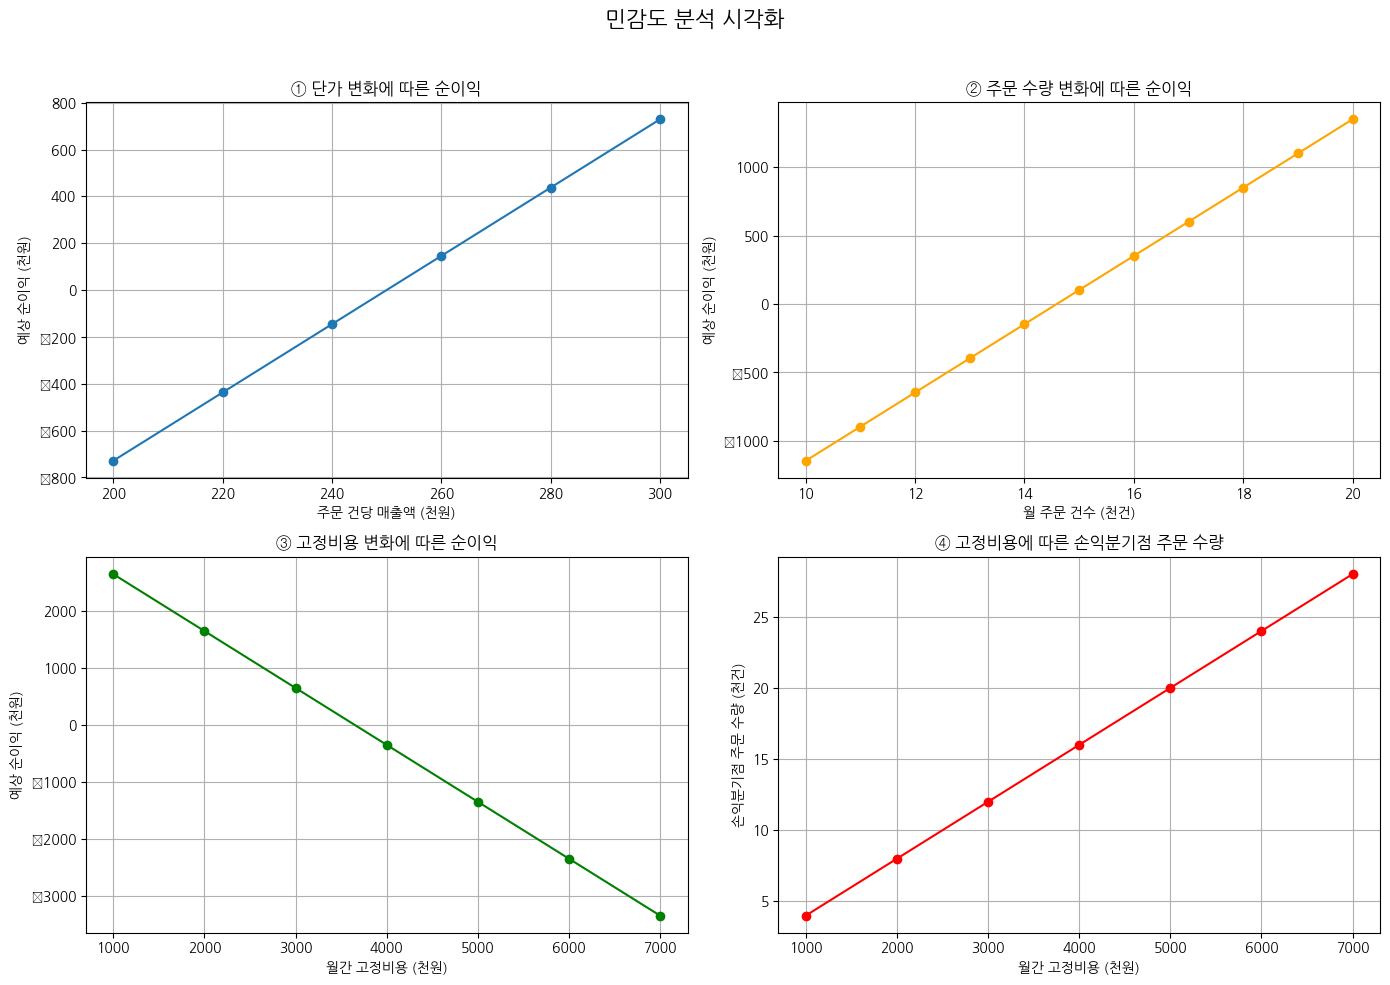

In [12]:
import matplotlib.pyplot as plt

# 시각화 설정
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("민감도 분석 시각화", fontsize=16)

# 1. 주문 건당 단가 변화에 따른 순이익
axs[0, 0].plot(df2['주문 건당 매출액(천원)'],
               df2['예상 순이익(천원)'],
               marker='o')
axs[0, 0].set_title("① 단가 변화에 따른 순이익")
axs[0, 0].set_xlabel("주문 건당 매출액 (천원)")
axs[0, 0].set_ylabel("예상 순이익 (천원)")
axs[0, 0].grid(True)

# 2. 주문 수량 변화에 따른 순이익
axs[0, 1].plot(df3['월 주문 건수(천건)'],
               df3['예상 순이익(천원)'],
               marker='o', color='orange')
axs[0, 1].set_title("② 주문 수량 변화에 따른 순이익")
axs[0, 1].set_xlabel("월 주문 건수 (천건)")
axs[0, 1].set_ylabel("예상 순이익 (천원)")
axs[0, 1].grid(True)

# 3. 고정비용 변화에 따른 순이익
axs[1, 0].plot(df4['월간 고정비용(천원)'],
               df4['예상 순이익(천원)'],
               marker='o', color='green')
axs[1, 0].set_title("③ 고정비용 변화에 따른 순이익")
axs[1, 0].set_xlabel("월간 고정비용 (천원)")
axs[1, 0].set_ylabel("예상 순이익 (천원)")
axs[1, 0].grid(True)

# 4. 고정비용에 따른 손익분기점 주문 수량
axs[1, 1].plot(df5['월간 고정비용(천원)'],
               df5['손익분기점 주문 수량(천건)'],
               marker='o', color='red')
axs[1, 1].set_title("④ 고정비용에 따른 손익분기점 주문 수량")
axs[1, 1].set_xlabel("월간 고정비용 (천원)")
axs[1, 1].set_ylabel("손익분기점 주문 수량 (천건)")
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 시나리오 분석

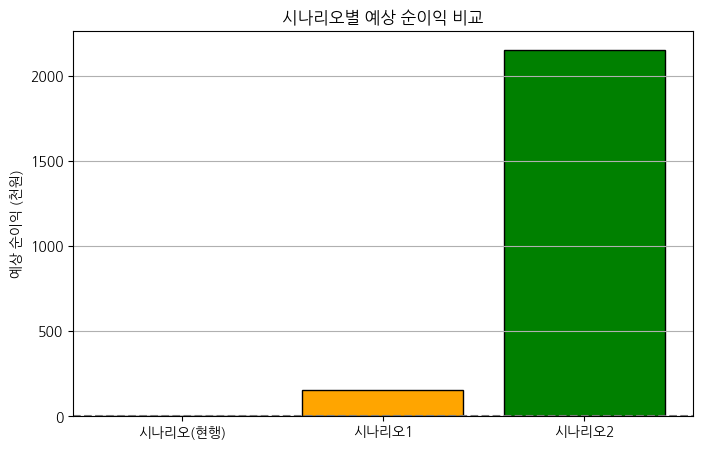

,시나리오명,월 고정비용(천원),예상 매출액(천원),예상 순이익(천원)
0,시나리오(현행),3647,3647.0,0.0
1,시나리오1,4347,4500.0,153.0
2,시나리오2,5347,7500.0,2153.0


In [13]:
# 시나리오 데이터
scenario_data = [
    {"이름": "시나리오(현행)", "월세 및 관리비": 1500, "관리 인건비": 800, "식비": 800, "기타 잡비": 547,
     "주문 건당 매출액": 250, "월 주문 건수(천건)": 14.588},
    {"이름": "시나리오1", "월세 및 관리비": 2000, "관리 인건비": 1000, "식비": 800, "기타 잡비": 547,
     "주문 건당 매출액": 250, "월 주문 건수(천건)": 18},
    {"이름": "시나리오2", "월세 및 관리비": 2500, "관리 인건비": 1500, "식비": 800, "기타 잡비": 547,
     "주문 건당 매출액": 250, "월 주문 건수(천건)": 30}
]

# 결과 저장 리스트 초기화
results = []

# 시나리오별 순이익 계산
for scenario in scenario_data:
    고정비 = scenario["월세 및 관리비"] + scenario["관리 인건비"] + scenario["식비"] + scenario["기타 잡비"]
    매출 = scenario["주문 건당 매출액"] * scenario["월 주문 건수(천건)"]
    순이익 = 매출 - 고정비

    results.append({
        "시나리오명": scenario["이름"],
        "월 고정비용(천원)": 고정비,
        "예상 매출액(천원)": 매출,
        "예상 순이익(천원)": 순이익
    })

# 데이터프레임 생성
df_scenario_summary = pd.DataFrame(results)

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(df_scenario_summary["시나리오명"], df_scenario_summary["예상 순이익(천원)"], color=['blue', 'orange', 'green'], edgecolor='black')
plt.title("시나리오별 예상 순이익 비교")
plt.ylabel("예상 순이익 (천원)")
plt.grid(axis='y')
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

df_scenario_summary 
